In [ ]:
!pip install shap

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade shap

In [ ]:
import shap
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import cifar10

# loading dateset
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Total number of Images in the Dataset:', len(X_train) + len(X_test))
print('Number of train images:', len(X_train))
print('Number of test images:', len(X_test))
print('Shape of training dataset:',X_train.shape)
print('Shape of testing dataset:',X_test.shape)

Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


In [ ]:
y_classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [ ]:
# This piece of code shows a random images and labels for given set of inputs

def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(y_classes[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return

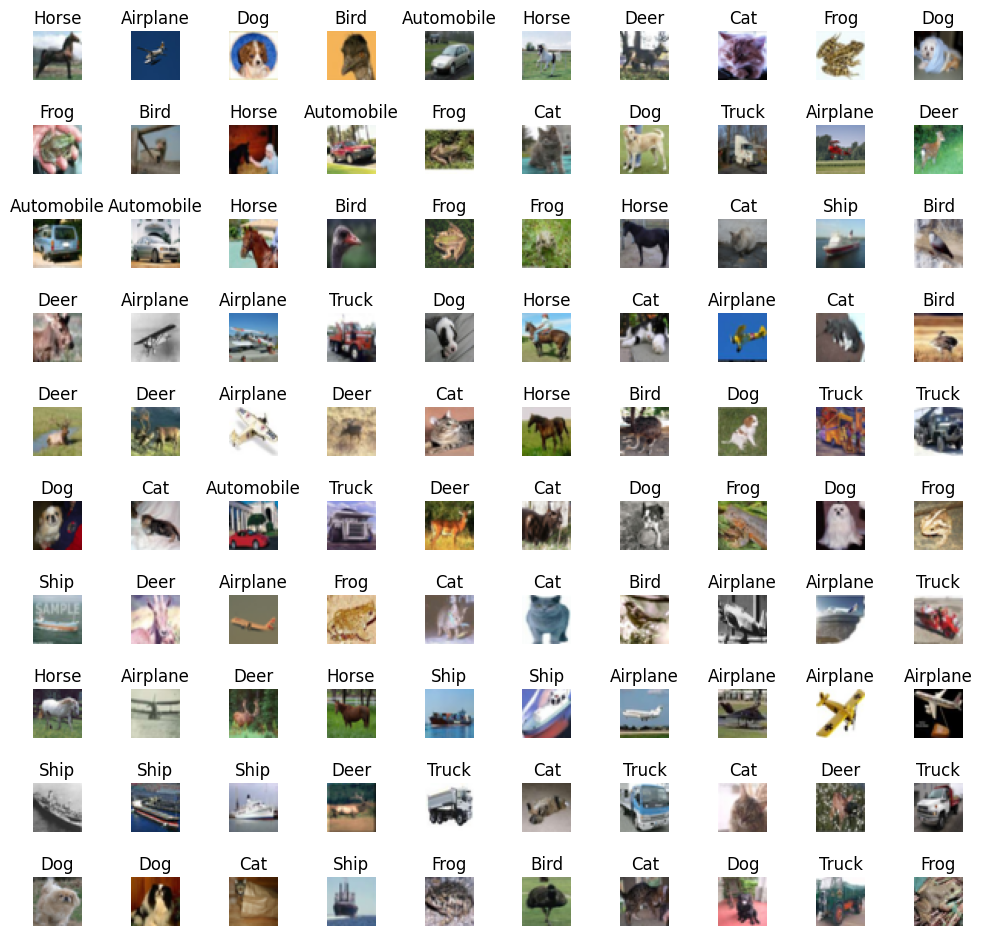

In [ ]:
num_row = 10
num_col = 10
showImages(num_row,num_col,X =X_train,Y = y_train)

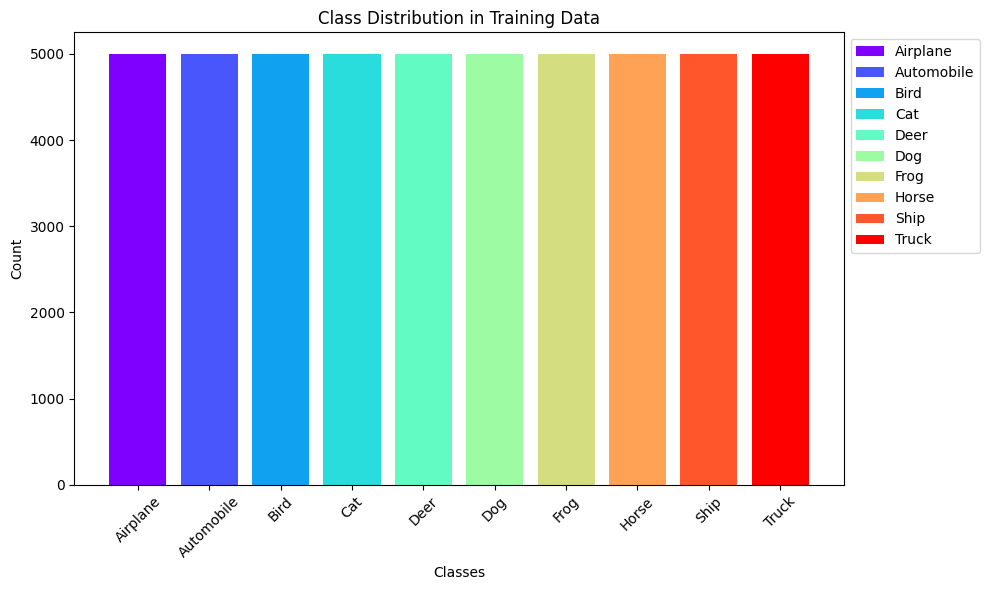

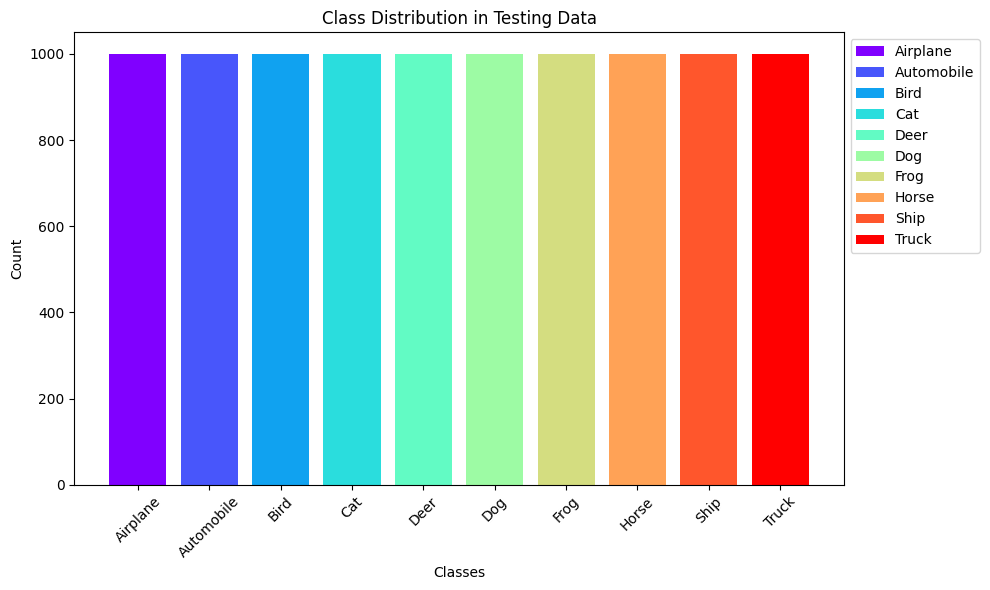

In [ ]:
def plot_class_distribution(y_data, dataset_name):
    class_count = np.bincount(y_data.flatten())
    colors = plt.cm.rainbow(np.linspace(0, 1, len(y_classes)))
    plt.figure(figsize=(10, 6))

    # Plotting each class with a unique color
    for i in range(len(y_classes)):
        plt.bar(y_classes[i], class_count[i], color=colors[i])

    plt.title(f"Class Distribution in {dataset_name} Data")
    plt.xlabel("Classes")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(y_classes, bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot distribution for training and testing data
plot_class_distribution(y_train, "Training")
plot_class_distribution(y_test, "Testing")

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/ 255
X_test = X_test/255

In [ ]:
#keras.utils.to_cotegorical(y, num_of_classes) convert the label
#data into (m, num_of class) array from (m, 1) input
import keras

y_train_one_hot = keras.utils.to_categorical(y_train, 10) #as classes = 10
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [ ]:
print('The one hot label is: ', y_train_one_hot[1])
print(y_train_one_hot.shape)

The one hot label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation = 'softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
#compiling model with loss, opt, metrics
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate=0.0009,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']

model.compile(loss = loss, optimizer = opt, metrics = metrics)

# fitting the model for training dataset
hist = model.fit(X_train, y_train_one_hot, batch_size = 64 , epochs = 50, validation_split = 0.2)

Epoch 1/50
625/625 [==============================] - 261s 412ms/step - loss: 1.7579 - accuracy: 0.3493 - val_loss: 1.3774 - val_accuracy: 0.5180
Epoch 2/50
625/625 [==============================] - 243s 388ms/step - loss: 1.3443 - accuracy: 0.5145 - val_loss: 1.0766 - val_accuracy: 0.6097
Epoch 3/50
625/625 [==============================] - 249s 399ms/step - loss: 1.1944 - accuracy: 0.5727 - val_loss: 1.0523 - val_accuracy: 0.6288
Epoch 4/50
625/625 [==============================] - 252s 403ms/step - loss: 1.0989 - accuracy: 0.6105 - val_loss: 0.9226 - val_accuracy: 0.6759
Epoch 5/50
625/625 [==============================] - 247s 394ms/step - loss: 1.0347 - accuracy: 0.6350 - val_loss: 0.8701 - val_accuracy: 0.7000
Epoch 6/50
625/625 [==============================] - 255s 408ms/step - loss: 0.9766 - accuracy: 0.6573 - val_loss: 0.8203 - val_accuracy: 0.7099
Epoch 7/50
625/625 [==============================] - 251s 402ms/step - loss: 0.9304 - accuracy: 0.6723 - val_loss: 0.7840 -

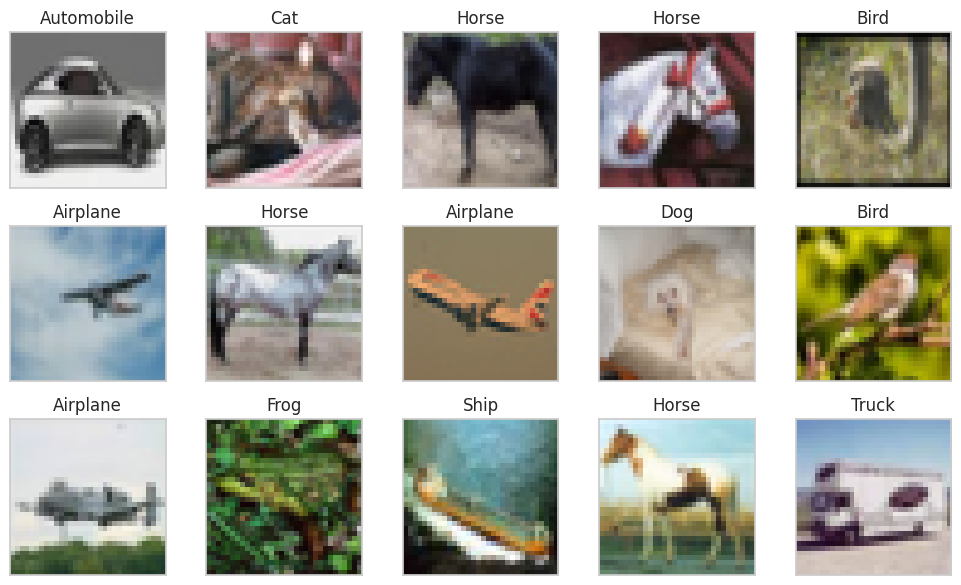

In [ ]:
import matplotlib.pyplot as plt

# Define the number of rows and columns in your grid
n_rows = 3
n_cols = 5

# Create a subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

# Replace with your own logic to select images
selected_indices = np.random.choice(len(X_test), n_rows * n_cols)

for i, ax in enumerate(axes.flat):
    if i < len(selected_indices):
        img_index = selected_indices[i]
        img = X_test[img_index]
        label = y_classes[y_test[img_index][0]]

        # Display the image with its label
        ax.imshow(img)
        ax.set_title(f"{label}")
    else:
        ax.axis('off')  # Turn off unused subplots

plt.tight_layout()
plt.show()

In [ ]:
model.save('my_model.keras')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_test_preds = model.predict(X_test)
y_test_preds = np.argmax(y_test_preds, axis=1)

print("Test Accuracy : {}".format(accuracy_score(y_test, y_test_preds)))
print("\nConfusion Matrix : ")
print(confusion_matrix(y_test, y_test_preds))
print("\nClassification Report :")
print(classification_report(y_test, y_test_preds, target_names=y_classes))

313/313 [==============================] - 5s 14ms/step
Test Accuracy : 0.7979

Confusion Matrix : 
[[786   7  43  17  13   0   5   4  92  33]
 [ 10 875   2   4   2   1   3   0  16  87]
 [ 54   2 716  35  62  31  58  21  13   8]
 [ 16   5  70 632  42  99  62  28  26  20]
 [ 10   1  57  47 777  12  43  39  11   3]
 [  9   0  68 166  31 652  24  31   9  10]
 [  6   3  38  48  22   7 858   4   9   5]
 [ 16   3  31  36  45  30   3 822   3  11]
 [ 23  14   2   4   1   2   2   2 934  16]
 [ 14  28   3   6   1   0   2   2  17 927]]

Classification Report :
              precision    recall  f1-score   support

    Airplane       0.83      0.79      0.81      1000
  Automobile       0.93      0.88      0.90      1000
        Bird       0.70      0.72      0.71      1000
         Cat       0.64      0.63      0.63      1000
        Deer       0.78      0.78      0.78      1000
         Dog       0.78      0.65      0.71      1000
        Frog       0.81      0.86      0.83      1000
       Hors

In [ ]:
def showImage(x, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(x[index])
  plt.xlabel(y_classes[y[index]])
  plt.show()

In [ ]:
background = X_train[np.random.choice(X_train.shape[0], 5000, replace=False)]  # Choose an appropriate size for the background dataset
explainer = shap.DeepExplainer(model, background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values = explainer.shap_values(X_train[:20])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [ ]:
# Get the actual labels as class indices
actual_labels_indices = y_test[:10].flatten()

# Get model predictions few examples in X_test
probs = model.predict(X_test[:10])

# Get the predicted labels by finding the class with the highest probability
predicted_labels_indices = [np.argmax(prob) for prob in probs]

# Define a list of class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Map actual and predicted class indices to class labels
actual_labels = [class_labels[i] for i in actual_labels_indices]
predicted_labels = [class_labels[i] for i in predicted_labels_indices]

print("Actual Labels: {}".format(actual_labels))
print("Predicted Labels: {}".format(predicted_labels))


1/1 [==============================] - 0s 30ms/step
Actual Labels: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']
Predicted Labels: ['cat', 'ship', 'ship', 'ship', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']


In [ ]:
# since the model has 10 outputs we get a list of 10 explanations (one for each output)
print(len(shap_values))

10


In [ ]:

# since the model has 2 inputs we get a list of 2 explanations (one for each input) for each output
print(len(shap_values[9]))

20


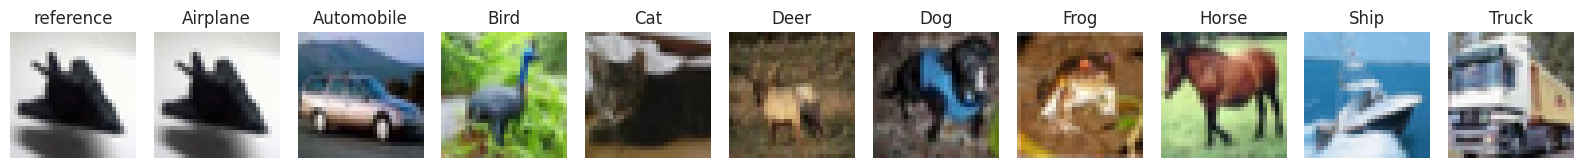

In [ ]:
# Name of the classes
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Save an example for each category
images_dict = dict()
for i, label in enumerate(y_train):
    if len(images_dict) == 10:
        break
    label_int = int(label)  # Convert the NumPy array to an integer
    if label_int not in images_dict:
        # Reshape the image to its original shape (32, 32, 3)
        images_dict[label_int] = X_train[i].reshape((32, 32, 3))

# Normalize images
for k, v in images_dict.items():
  v = v.astype('float32') / 255

# Plot
def plot_categories(images):

  fig, axes = plt.subplots(1, 11, figsize=(16, 15))
  axes = axes.flatten()

  # Reference
  ax = axes[0]
  ax.set_title("reference")
  ax.imshow(images_dict[0])
  ax.set_axis_off()

  # Other classes
  for k, v in images.items():
    ax = axes[k+1]
    ax.imshow(v, cmap='gray')
    ax.set_title(f"{y_classes[k]}")
    ax.set_axis_off()

  plt.tight_layout()
  return axes

# Reshape images
for k, v in images_dict.items():
  v = v.reshape((32, 32, 3))

# Plot
axes = plot_categories(images_dict)
plt.show()

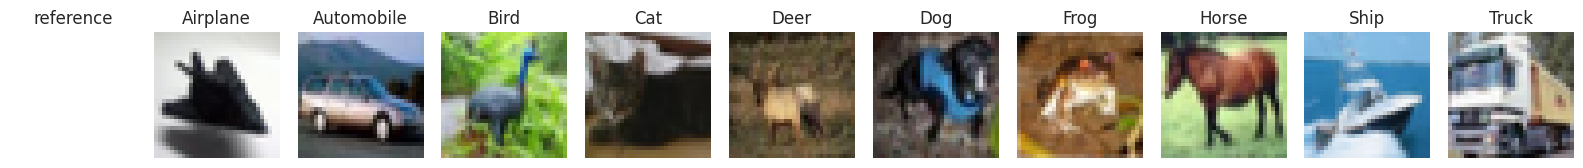

In [ ]:
# Name of the classes
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Save an example for each category
images_dict = dict()
for i, label in enumerate(y_train):
    if len(images_dict) == 10:
        break
    label_int = int(label)  # Convert the NumPy array to an integer
    if label_int not in images_dict:
        # Reshape the image to its original shape (32, 32, 3)
        images_dict[label_int] = X_train[i].reshape((32, 32, 3))

# Function to plot images
def plot_categories(images):
    fig, axes = plt.subplots(1, 11, figsize=(16, 15))
    axes = axes.flatten()

    # Plot empty canvas
    ax = axes[0]
    dummy_array = np.array([[[0, 0, 0, 0]]], dtype='uint8')
    ax.set_title("reference")
    ax.set_axis_off()
    ax.imshow(dummy_array, interpolation='nearest')

    # Plot an image for every category
    for k, v in images.items():
        ax = axes[k + 1]  # Use k + 1 to avoid accessing axes[0] again
        ax.imshow(v, cmap=plt.cm.binary)
        ax.set_title(f"{y_classes[k]}")
        ax.set_axis_off()

    plt.tight_layout()
    return axes  # Return the 'axes' variable

# Use the function to plot
axes = plot_categories(images_dict)
plt.show()


In [ ]:

# Take a random sample of 5000 training images
background = X_train[np.random.choice(X_train.shape[0], 5000, replace=False)]

# Use DeepExplainer to explain predictions of the model
e = shap.DeepExplainer(model, background)

# Compute the values
shap_values = e.shap_values(X_test[1:5])

In [ ]:
# Save an example of each class from the test set
X_test_dict = dict()
for i, label in enumerate(y_test):
    if len(X_test_dict) == 10:
        break
    label_int = int(label)  # Convert the NumPy array to an integer
    if label_int not in X_test_dict.keys():
        X_test_dict[label_int] = X_test[i]

# Convert to a list preserving the order of classes
X_test_each_class = [X_test_dict[i] for i in sorted(X_test_dict)]

# Convert to a NumPy array
X_test_each_class = np.asarray(X_test_each_class)

# Print the shape of the tensor
print(f"X_test_each_class tensor has shape: {X_test_each_class.shape}")

X_test_each_class tensor has shape: (10, 32, 32, 3)


In [ ]:
#Compute predictions
predictions = model.predict(X_test_each_class)

#Apply argmax to get predicted class
np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 28ms/step


array([8, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#Compute shap values using DeepExplainer instance
shap_values = e.shap_values(X_test_each_class)

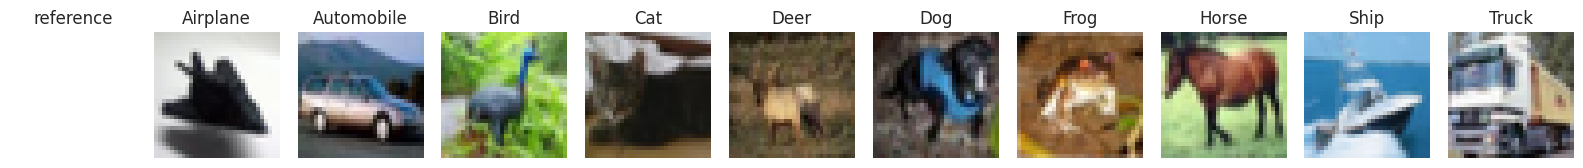

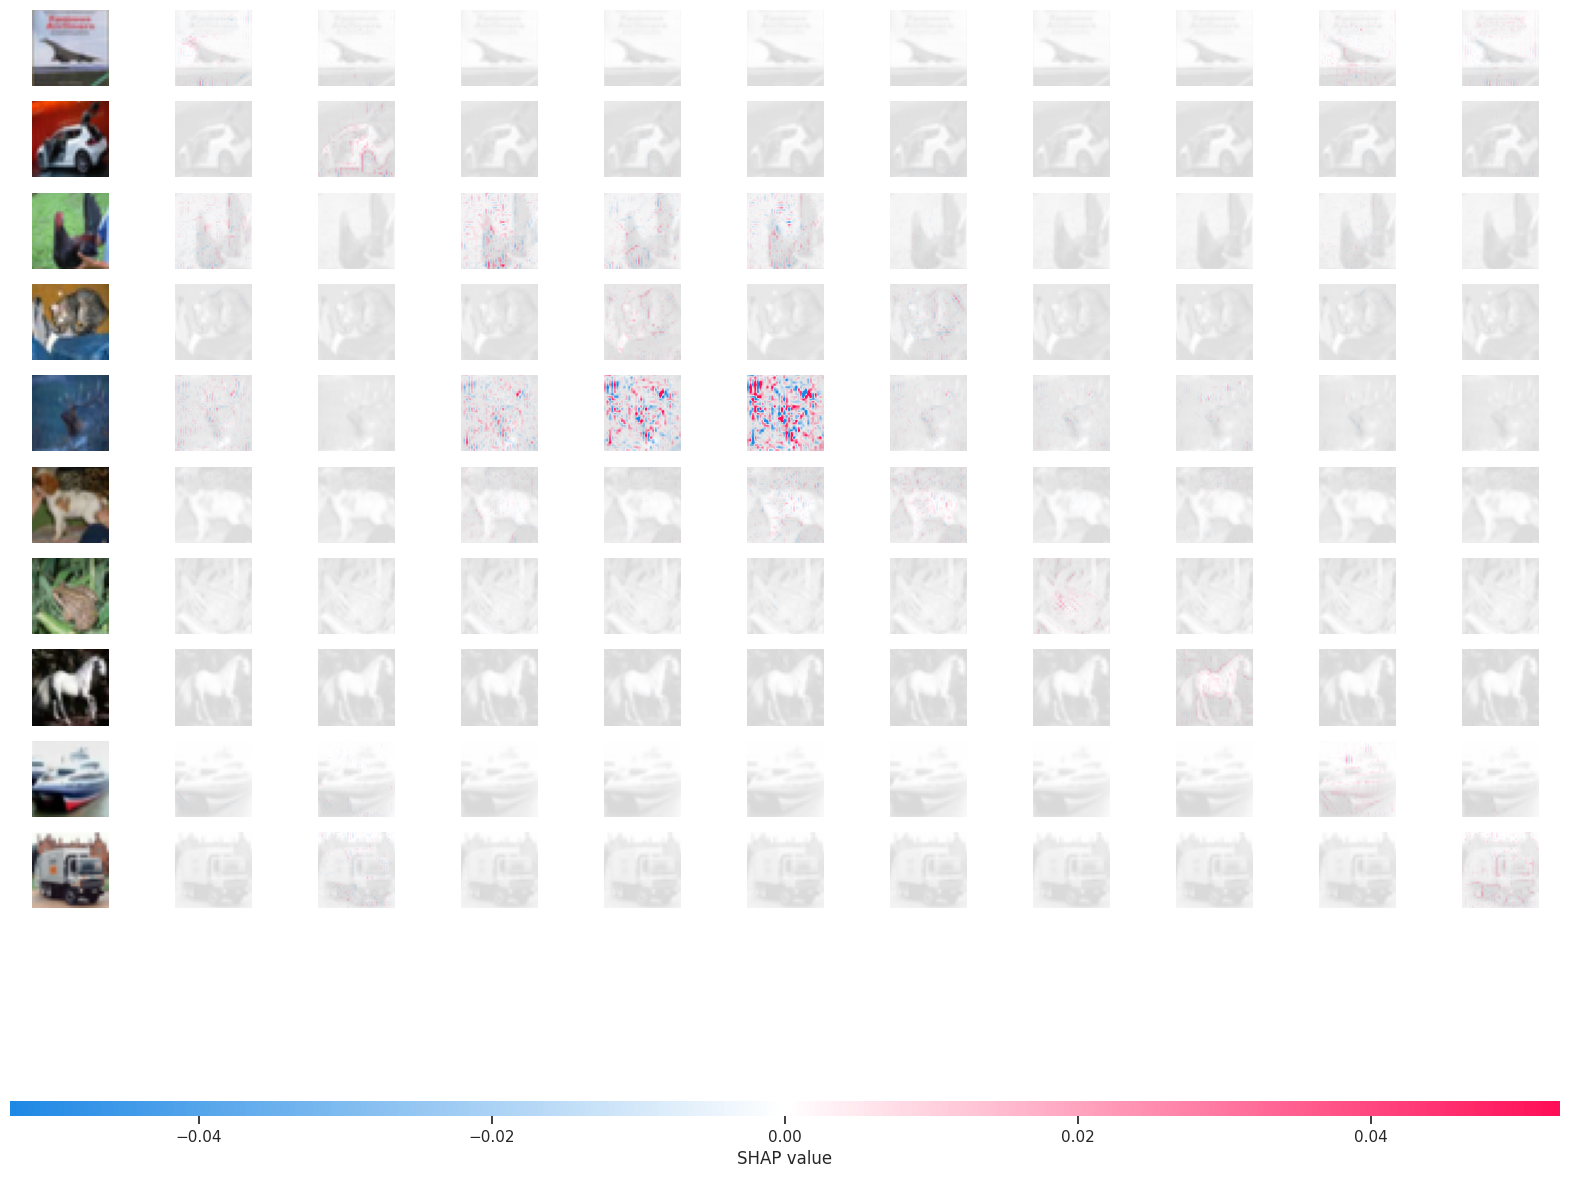

In [ ]:
#Plot reference column
plot_categories(images_dict)

#Print an empty line to separate the two plots
print()

#Plot shap values
shap.image_plot(shap_values, X_test_each_class)

1/1 [==============================] - 0s 28ms/step


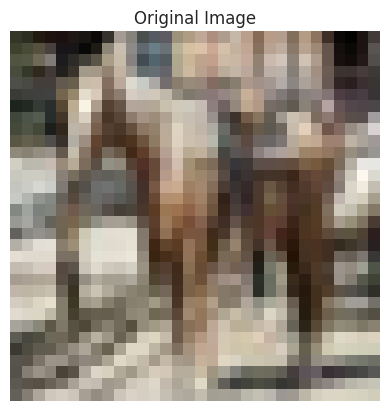

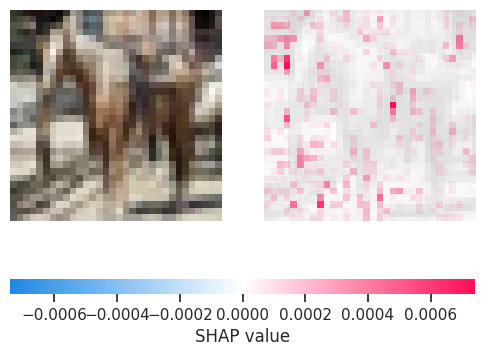

<Figure size 640x480 with 0 Axes>

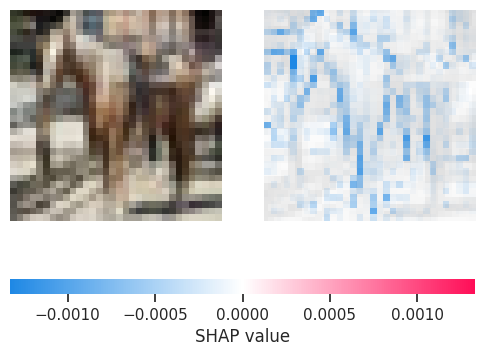

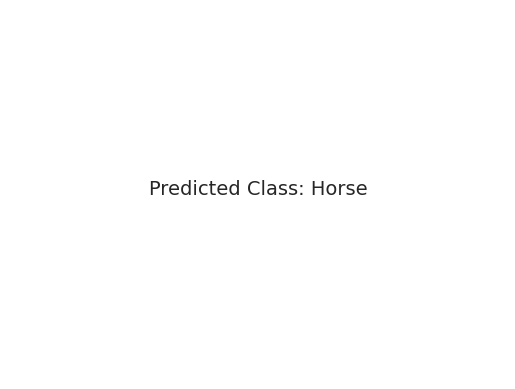

In [ ]:
import matplotlib.pyplot as plt

# Load a single image
image = X_test[6745]

# Expanding dimensions
image = np.expand_dims(image, axis=0)

# Getting SHAP values fro that image
shap_values = e.shap_values(image)

prediction = model.predict(image)
predicted_class = np.argmax(prediction)

# Plotting the original image
plt.imshow(image[0])
plt.title("Original Image")
plt.axis('off')
plt.show()

# Plotting image with only positive attributions
positive_shap = np.where(shap_values[0] > 0, shap_values[0], 0)
shap.image_plot((positive_shap), image)
plt.suptitle("Positive Attributions")
plt.show()

# Plotting image with only negative attributions
negative_shap = np.where(shap_values[0] < 0, shap_values[0], 0)
shap.image_plot([negative_shap], image)
#plt.title("Negative Attributions")
#plt.axis('off')
#plt.show()

# Displaying the predicted class
plt.text(0.5, 0.5, f"Predicted Class: {y_classes[predicted_class]}", fontsize=14, ha='center')
plt.axis('off')
plt.show()


In [ ]:
# Load your pre-trained model
model = keras.models.load_model('my_model.keras')

In [ ]:
# Define a function to compute Grad-CAM
def compute_grad_cam(model, img_array, last_conv_layer_name):
    # Get the model's output tensor and the specified layer
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Get the predicted class index
    pred_class = np.argmax(model.predict(img_array)[0])

    # Compute the gradients with respect to the predicted class
    with tf.GradientTape() as tape:
        last_conv_output, model_output = grad_model(img_array)
        class_output = model_output[:, pred_class]
    grads = tape.gradient(class_output, last_conv_output)

    # Global average pooling
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute the heatmap
    last_conv_output = last_conv_output[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, last_conv_output), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy(), pred_class

1/1 [==============================] - 0s 25ms/step


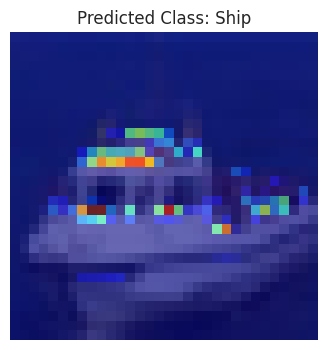

In [ ]:
# Choose an image from the test set
img = X_test[8975]

# Preprocess the image for model input
img_array = np.expand_dims(img, axis=0)

# Specify the name of the last convolutional layer in your model
last_conv_layer_name = "conv2d"  # You should replace this with the actual name

# Compute the Grad-CAM heatmap and get the predicted class
heatmap, pred_class = compute_grad_cam(model, img_array, last_conv_layer_name)

# Display the original image
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {y_classes[pred_class]}')

# Display the Grad-CAM heatmap as an overlay
plt.imshow(heatmap, cmap='jet', alpha=0.6)
plt.show()

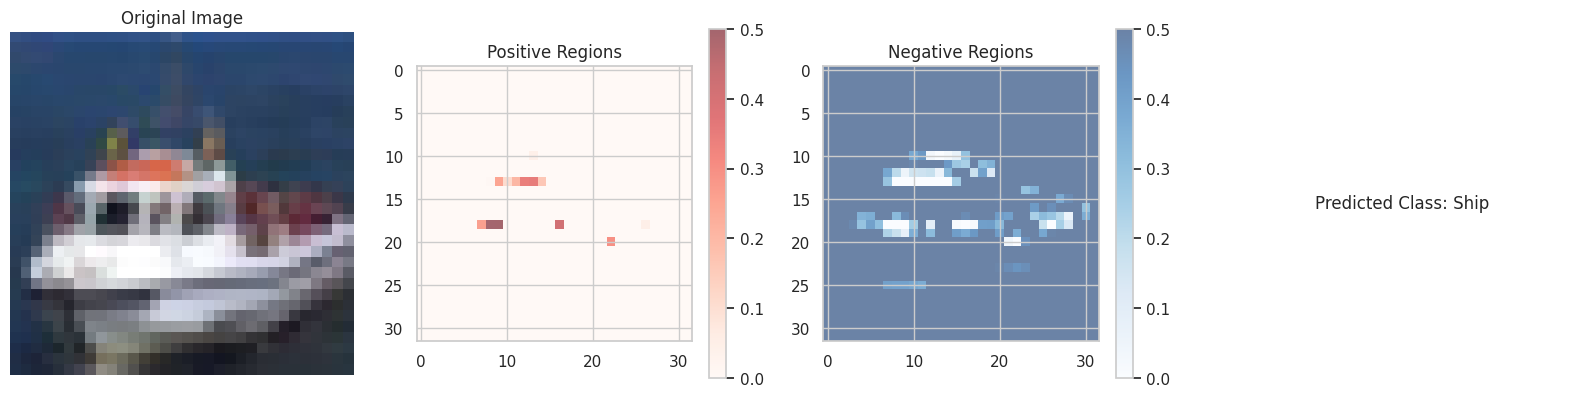

In [ ]:
# Split the Grad-CAM heatmap into positive and negative regions
positive_heatmap = np.maximum(heatmap - 0.5, 0)  # Positive values
negative_heatmap = np.maximum(0.5 - heatmap, 0)  # Negative values

# Display the original image, positive, negative, and predicted class text in a single row
plt.figure(figsize=(16, 4))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

# Positive contributions
plt.subplot(1, 4, 2)
plt.imshow(positive_heatmap, cmap='Reds', alpha=0.6)
plt.colorbar()
plt.title('Positive Regions')

# Negative contributions
plt.subplot(1, 4, 3)
plt.imshow(negative_heatmap, cmap='Blues', alpha=0.6)
plt.colorbar()
plt.title('Negative Regions')

# Predicted class text
plt.subplot(1, 4, 4)
plt.axis('off')
predicted_text = f'Predicted Class: {y_classes[pred_class]}'
plt.text(0.5, 0.5, predicted_text, ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=cb3626a14a776b8a80831a0c25a0b069a1b8e933354b51066b4b361acc34674e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=y_classes)
print("Classification Report:")
print(report)


313/313 [==============================] - 5s 16ms/step
Accuracy: 0.7979
Confusion Matrix:
[[786   7  43  17  13   0   5   4  92  33]
 [ 10 875   2   4   2   1   3   0  16  87]
 [ 54   2 716  35  62  31  58  21  13   8]
 [ 16   5  70 632  42  99  62  28  26  20]
 [ 10   1  57  47 777  12  43  39  11   3]
 [  9   0  68 166  31 652  24  31   9  10]
 [  6   3  38  48  22   7 858   4   9   5]
 [ 16   3  31  36  45  30   3 822   3  11]
 [ 23  14   2   4   1   2   2   2 934  16]
 [ 14  28   3   6   1   0   2   2  17 927]]
Classification Report:
              precision    recall  f1-score   support

    Airplane       0.83      0.79      0.81      1000
  Automobile       0.93      0.88      0.90      1000
        Bird       0.70      0.72      0.71      1000
         Cat       0.64      0.63      0.63      1000
        Deer       0.78      0.78      0.78      1000
         Dog       0.78      0.65      0.71      1000
        Frog       0.81      0.86      0.83      1000
       Horse       0.8

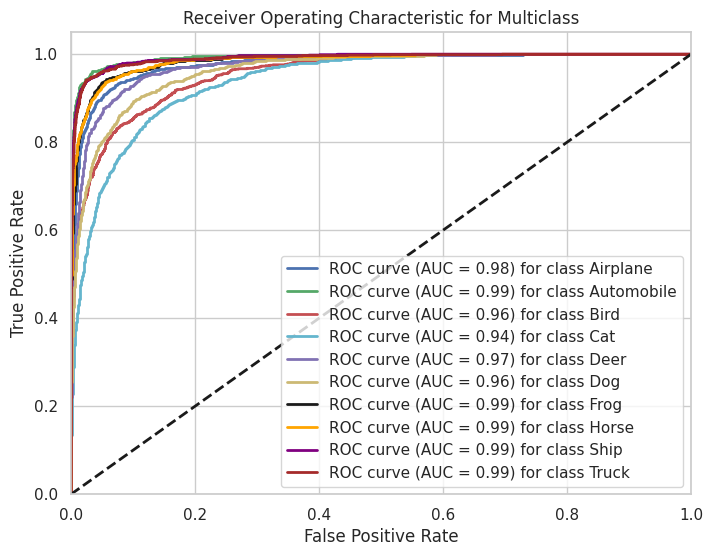

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming multiclass classification
n_classes = len(y_classes)  # Number of classes

fpr = {}  # False Positive Rate for each class
tpr = {}  # True Positive Rate for each class
roc_auc = {}  # AUC for each class

for i in range(n_classes):
    # Create binary labels for the current class vs. all others
    y_true_class = (y_test == i).astype(int)
    y_pred_class = y_pred[:, i]

    # Calculate ROC curve and AUC for the current class
    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_pred_class)
    roc_auc[i] = roc_auc_score(y_true_class, y_pred_class)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {y_classes[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred_classes)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.7754444444444444


In [ ]:
def top_k_accuracy(y_true, y_pred, k):
    top_k_indices = np.argpartition(y_pred, -k, axis=1)  # Find the indices of the top-k predictions
    top_k_classes = top_k_indices[:, -k:]  # Get the top-k predicted classes

    # Create a boolean array where each row represents if the true class is among the top-k predicted classes
    is_true_in_top_k = np.any(top_k_classes == y_true[:, np.newaxis], axis=1)

    # Calculate the top-k accuracy
    top_k_acc = np.mean(is_true_in_top_k)
    return top_k_acc

k = 5  # Adjust k to your desired value
top_k_acc = top_k_accuracy(y_test, y_pred, k)
print(f"Top-{k} Accuracy:", top_k_acc)

Top-5 Accuracy: 0.98


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Number of splits for K-Fold Cross-Validation
n_splits = 5

# Define the K-Fold strategy (Stratified for maintaining class distributions)
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store performance metrics across folds
accuracies = []
conf_matrices = []

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_one_hot[train_index], y_train_one_hot[val_index]

    # Define, compile, and train your model using X_train_fold, y_train_fold
    # Model definition and training (as per your existing code)

    # Evaluate your model on X_val_fold, y_val_fold
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracies.append(scores[1])  # Assuming accuracy is the second metric

    # Additionally, you might want to compute and store the confusion matrices
    # conf_matrix = confusion_matrix(y_val_fold, model.predict(X_val_fold).argmax(axis=1))
    # conf_matrices.append(conf_matrix)

# Display the performance across folds
print(f"Accuracy across folds: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies)}")


Accuracy across folds: [0.9323999881744385, 0.9297999739646912, 0.9318000078201294, 0.930400013923645, 0.9319000244140625]
Mean Accuracy: 0.9312600016593933
